# Import Library

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error

%matplotlib inline
rcParams['figure.figsize'] = 8, 5

# Generate Sin(x)

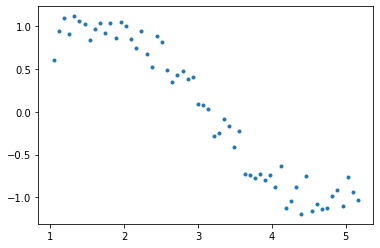

In [3]:
# define input array with angles from 60deg to 300deg converted to radians
X = np.array([i * np.pi / 180 for i in range(60, 300, 4)])
np.random.seed(100)  # Setting seed for reproducability
y = np.sin(X) + np.random.normal(0, 0.15, len(X))
X = X.reshape(60, -1)
y = y.reshape(60, -1)
data = pd.DataFrame(np.column_stack([X, y]), columns=['X', 'y'])
plt.plot(data['X'], data['y'], '.')

In [4]:
from sklearn.svm import SVR


def example_svm_regression(X, y, plot_dict, kernel, C=1):

    for params in plot_dict:
        # define estimator object
        kernel_dict = {
            'linear': SVR(kernel='linear', C=params),
            'poly': SVR(kernel='poly', C=C, degree=params),
            'rbf': SVR(kernel='rbf', C=C, gamma=params)
        }

        # fit the model
        if kernel in kernel_dict:
            model = kernel_dict[kernel]
            model.fit(X, y)
            y_pred = model.predict(X)
            mae = mean_absolute_error(y_pred, y)

        # check if a plot is to be made for the entered power
        plt.subplot(plot_dict[params])
        plt.tight_layout()
        plt.plot(X, y, '.')
        plt.plot(X, y_pred)
        if kernel == 'linear':
            plt.title('Plot for C: %.2f' % params + '\n' + 'mae:%.2f' % mae)
        elif kernel == 'poly':
            plt.title('Plot for degree: %.2f' % params + '\n' +
                      'mae:%.2f' % mae)
        elif kernel == 'rbf':
            plt.title('Plot for gamma: %.2f' % params + '\n' +
                      'mae:%.2f' % mae)

# RBF SVR：看圖是否看得出來gamma多少是比較好的選擇？

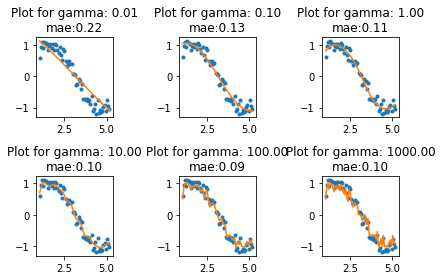

In [5]:
plot_dict = {0.01: 231, 0.1: 232, 1: 233, 10: 234, 100: 235, 1000: 236}
example_svm_regression(X, y, plot_dict, kernel='rbf')

# 利用5-folds Cross Validation算不同gamma的MAE

In [6]:
from sklearn.model_selection import KFold


def cross_validation(X, y, folds, gamma):
    kf = KFold(n_splits=folds, random_state=None, shuffle=False)
    evaluation = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = SVR(kernel='rbf', C=1, gamma=gamma)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_pred, y_test)
        evaluation.append(mae)
    return evaluation

In [7]:
folds = 5
cv = pd.DataFrame()
for gamma in np.logspace(-2, 3, 6).tolist():  # generate gamma from 1e-2~1e3
    # print(gamma)
    cv[str(gamma)] = cross_validation(X, y, folds, gamma)

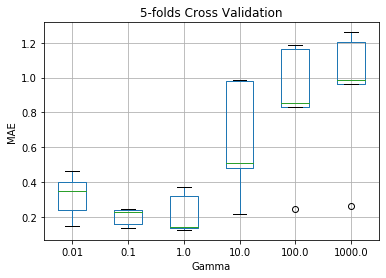

In [8]:
plt.title('5-folds Cross Validation')
plt.xlabel('Gamma')
plt.ylabel('MAE')
cv.boxplot()

In [9]:
cv

,0.01,0.1,1.0,10.0,100.0,1000.0
0,0.240295,0.228815,0.319652,0.983301,1.162192,1.203920
1,0.397592,0.159306,0.124477,0.509821,0.853884,0.965878
2,0.147584,0.136731,0.136673,0.214614,0.245548,0.261242
3,0.461221,0.241619,0.140147,0.478019,0.832765,0.983377
4,0.349623,0.242203,0.369311,0.985615,1.190064,1.260761
